In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import csv

In [ ]:
nn_architecture = [
    {"layer_size": 10, "activation": "none"}, # input layer
    {"layer_size": 100, "activation": "relu"},
    {"layer_size": 100, "activation": "relu"},
    {"layer_size": 100, "activation": "relu"},
    {"layer_size": 100, "activation": "relu"},
    {"layer_size": 31, "activation": "sigmoid"}
]

In [ ]:


def initialize_parameters(nn_architecture, seed = 3):
    np.random.seed(seed)
    # python dictionary containing our parameters "W1", "b1", ..., "WL", "bL"
    parameters = {}
    number_of_layers = len(nn_architecture)

    for l in range(1, number_of_layers):
        parameters['W' + str(l)] = np.random.randn(
            nn_architecture[l]["layer_size"],
            nn_architecture[l-1]["layer_size"]
            ) * 0.01
        parameters['b' + str(l)] = np.zeros((nn_architecture[l]["layer_size"], 1))

    return parameters
def sigmoid(Z):
    S = 1 / (1 + np.exp(-Z))
    return S

def relu(Z):
    R = np.maximum(0, Z)
    return R

def sigmoid_backward(dA, Z):
    S = sigmoid(Z)
    dS = S * (1 - S)
    return dA * dS

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0
    return dZ




def L_model_forward(X, parameters, nn_architecture):
    forward_cache = {}
    A = X
    number_of_layers = len(nn_architecture)

    for l in range(1, number_of_layers):
        A_prev = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        activation = nn_architecture[l]["activation"]
        Z, A = linear_activation_forward(A_prev, W, b, activation)
        forward_cache['Z' + str(l)] = Z
        forward_cache['A' + str(l-1)] = A_prev

    AL = A

    return AL, forward_cache

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z = linear_forward(A_prev, W, b)
        A = sigmoid(Z)
    elif activation == "relu":
        Z = linear_forward(A_prev, W, b)
        A = relu(Z)

    return Z, A

def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    return Z

def compute_cost(AL, Y):
    m = Y.shape[1]
    # Compute loss from AL and y
    logprobs = np.multiply(np.log(AL),Y) + np.multiply(1 - Y, np.log(1 - AL))
    # cross-entropy cost
    cost = - np.sum(logprobs) / m

    cost = np.squeeze(cost)

    return cost


def L_model_backward(AL, Y, parameters, forward_cache, nn_architecture):
    grads = {}
    number_of_layers = len(nn_architecture)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    dA_prev = dAL

    for l in reversed(range(1, number_of_layers)):
        dA_curr = dA_prev

        activation = nn_architecture[l]["activation"]
        W_curr = parameters['W' + str(l)]
        Z_curr = forward_cache['Z' + str(l)]
        A_prev = forward_cache['A' + str(l-1)]

        dA_prev, dW_curr, db_curr = linear_activation_backward(dA_curr, Z_curr, A_prev, W_curr, activation)

        grads["dW" + str(l)] = dW_curr
        grads["db" + str(l)] = db_curr

    return grads

def linear_activation_backward(dA, Z, A_prev, W, activation):
    if activation == "relu":
        dZ = relu_backward(dA, Z)
        dA_prev, dW, db = linear_backward(dZ, A_prev, W)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, Z)
        dA_prev, dW, db = linear_backward(dZ, A_prev, W)

    return dA_prev, dW, db

def linear_backward(dZ, A_prev, W):
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db


def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(1, L):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]

    return parameters





In [ ]:
def accuracy(y_pred,ytrue):
    prediction=y_pred.T.argmax(axis=1)
    actual=ytrue.T.argmax(axis=1)
    acc=np.mean(prediction == actual)

    #print('accuracy:',acc)
    return acc

def L_layer_model(Xi, Yi, nn_architecture, learning_rate = 0.8, num_iterations = 7150, print_cost=False):
    np.random.seed(1)
    # keep track of loss
    costs = []
    accur=[]
    # Parameters initialization.
    parameters = initialize_parameters(nn_architecture)
    batch_size=128

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        start=0
        end=128
        ac=[]
        lo=[]
        for j in range(248//16):
              X=Xi.T[start:end]
              Y=Yi.T[start:end]
              X=X.T
              Y=Y.T
              # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
              AL, forward_cache = L_model_forward(X, parameters, nn_architecture)

              # Compute loss.
              cost = compute_cost(AL, Y)
              # Backward propagation.
              grads = L_model_backward(AL, Y, parameters, forward_cache, nn_architecture)
              # Update parameters.
              parameters = update_parameters(parameters, grads, learning_rate)

              start=start+batch_size
              end=end+batch_size
              lo.append(cost)
              acc=accuracy(AL,Y)
              ac.append(acc)
        accur.append(np.mean(ac))
        costs.append(np.mean(lo))
    plt.plot(np.squeeze(costs))
    plt.ylabel('loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    plt.plot(np.squeeze(accur))
    plt.ylabel('accuracy')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters

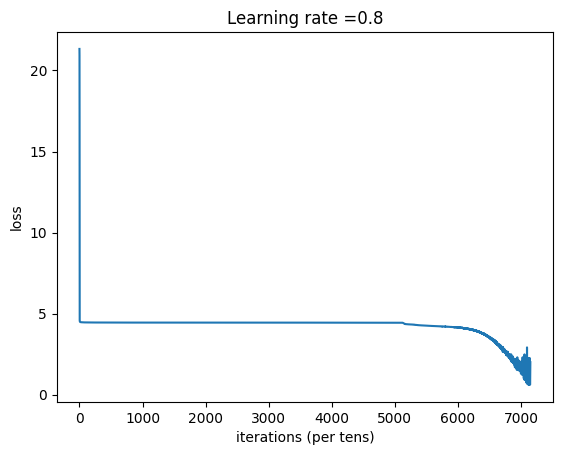

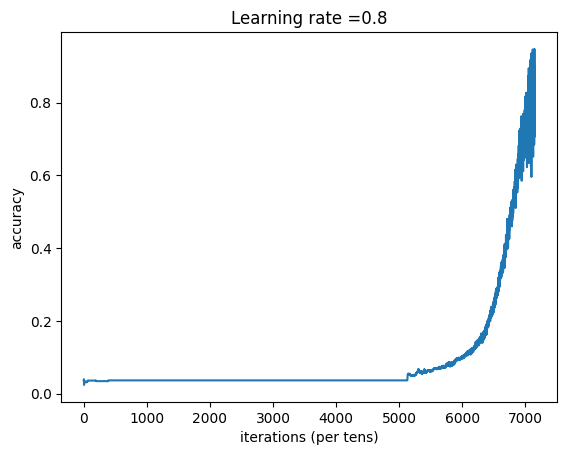

In [ ]:

csv_filename = '/content/ACdata.csv'
y_new=[]
with open(csv_filename) as f:
    reader = csv.reader(f)
    lst = list(reader)
    x=np.array(lst)
l=len(x)//16
x=x[:l]
y=x.T[-1,:]
x=x[:,0:-1]

for i in range(len(y)):

    yn = [0 for i in range(31)]
    yn[int(y[i])] = 1
    y_new.append(yn)
x = x.astype(np.float64)
y=np.array(y_new)


parameter=L_layer_model(x.T,y.T,nn_architecture)

In [ ]:
from numpy.ma.core import identity

csv_filename = '/content/ACdata.csv'
y_new=[]
with open(csv_filename) as f:
    reader = csv.reader(f)
    lst = list(reader)
    x=np.array(lst)
l=len(x)//16
x=x[:l]
y=x.T[-1,:]
x=x[:,0:-1]
for i in range(len(y)):

    yn = [0 for i in range(31)]
    yn[int(y[i])] = 1
    y_new.append(yn)
x = x.astype(np.float64)
y=np.array(y_new)

x_test=x[0:150]
y_test=y[0:150]

parameter1=initialize_parameters(nn_architecture)

AL, forward_cache = L_model_forward(x_test.T, parameter1, nn_architecture)
print("acccuracy of Test data before traing the Neural Network:",accuracy(AL,y_test.T))
AL, forward_cache = L_model_forward(x_test.T, parameter, nn_architecture)
print("acccuracy of Test data after traing the Neural Network:",accuracy(AL,y_test.T))


acccuracy of Test data before traing the Neural Network: 0.05333333333333334
acccuracy of Test data after traing the Neural Network: 0.9066666666666666


In [ ]:
print(AL.T[0:5],y_test[0:5])

[[4.23499751e-05 2.17718681e-07 2.35285219e-06 2.78050208e-04
  1.03400838e-02 5.59978026e-04 2.30999115e-09 2.62997595e-04
  1.89590851e-03 1.16658741e-08 1.64940747e-07 7.41424207e-11
  3.19902481e-10 2.21901866e-06 2.26527592e-05 6.43461314e-04
  1.32537759e-02 3.79082248e-08 5.52767199e-04 3.89019875e-14
  9.94630447e-10 1.10436441e-14 9.93649445e-01 3.51701856e-14
  3.64488907e-11 2.31768541e-01 9.92226978e-17 1.07232137e-07
  2.16539771e-16 2.73497954e-09 1.59862093e-06]
 [2.01042630e-04 4.72631069e-07 2.92713309e-03 6.40874911e-05
  1.11310249e-08 1.32900631e-08 1.19614769e-12 8.87783006e-03
  6.78348389e-01 1.77684523e-11 2.87792208e-03 2.42512608e-04
  4.29311172e-03 6.53245608e-03 1.22585159e-13 4.70102297e-08
  8.16708025e-04 2.91108162e-02 4.92840368e-06 1.15102645e-10
  1.91951903e-07 2.18321296e-05 7.26343163e-04 6.29918372e-09
  2.69897498e-08 6.18506614e-14 6.09861282e-12 1.59174140e-06
  5.60066939e-08 2.99136924e-08 3.65627125e-08]
 [4.84011435e-06 5.77108195e-05 1.79

In [ ]:
prediction=AL.T[50:55].argmax(axis=1)
actual=y_test[50:55].argmax(axis=1)
print("predicted output",prediction,"\nActual output",actual)

predicted output [4 4 4 4 4] 
Actual output [26 17 10 13  4]


In [ ]:
AU, forward_cache = L_model_forward(x_test.T, parameter1, nn_architecture)
b_prediction=AU.T[50:55].argmax(axis=1)
print("Output of Before traing:",prediction)

[4 4 4 4 4]
